In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# 2. Implement thuật toán PCA bằng numpy

In [184]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        
        #Calculate the mean vector, then subtract the data points for that vector
        X = X - np.mean(X, axis= 0)
        # Covariance Matrix
        cov_mat = np.cov(X.T)
        # Eigenvalue and eigenvectors
        eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
        # Get the index of the eigenvalue from large to small
        idxs = np.argsort(eigen_values)[::-1] 
        # Sort the eigenvalues and eigenvectors 
        eigen_values = eigen_values[idxs]
        eigen_vectors = eigen_vectors.T
        eigen_vectors = eigen_vectors[idxs]
        # Select a subset of eigenvectors
        self.n_components = eigen_vectors[:self.n_components]
        # Explained Variance
        total_variance = np.sum(eigen_values)
        exp_var_percent = [(i / total_variance) * 100 for i in eigen_values]
        self.exp_variance = np.cumsum(exp_var_percent)
        
    def transform(self, X):
        X = X - np.mean(X, axis= 0)
        return np.dot(X, self.n_components.T)
        
    def explained_variance(self):
        return self.exp_variance

# 3. Dùng thuật toán ở bài 2, giảm dữ liệu iris về 2 chiều
a. Visualize dữ liệu giảm chiều với scatter plot và label của hoa<br>
b. Vẽ explained variance graph với các chiều của dữ liệu

In [192]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [193]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [194]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

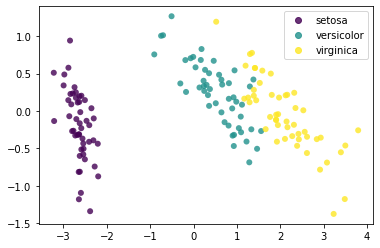

In [195]:
# Visualize the data after reducing to 2 dimensions
fig, ax = plt.subplots()
scatter = ax.scatter(x1, x2, c= y,edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
ax.legend(handles= scatter.legend_elements()[0], labels= list(target_names))
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

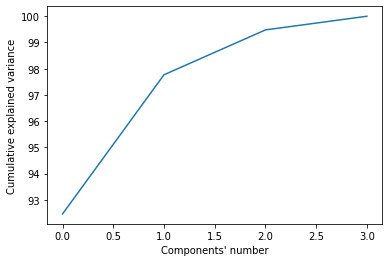

In [177]:
# Explained variance graph
fig1, ax1 = plt.subplots()
ax1.plot(pca.explained_variance(), label= "Explained Variance")
plt.xlabel("Components' number")
plt.ylabel('Cumulative explained variance')

# 4. Dùng bài 3 với thuật toán PCA trong sklearn

In [200]:
from sklearn.decomposition import PCA
pca = PCA(2)  
X_projected = pca.fit_transform(iris.data)

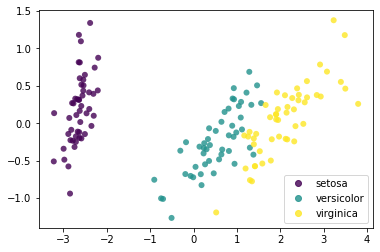

In [201]:
# Visualize the data after reducing to 2 dimensions
scatter = plt.scatter(X_projected[:,0], X_projected[:,1], c= y,edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
plt.legend(handles= scatter.legend_elements()[0], labels= list(target_names))
plt.show()

In [180]:
pca = PCA() 
X_projected = pca.fit(iris.data)

Text(0, 0.5, 'Cumulative explained variance')

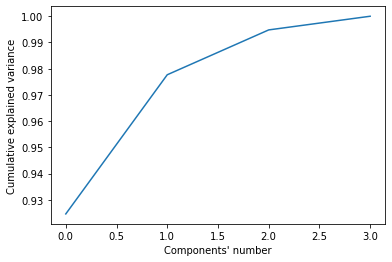

In [181]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components' number")
plt.ylabel('Cumulative explained variance')